In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Billionaire.csv", encoding= "latin1")
data

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [4]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [6]:
data = data.dropna(subset=['Age'])
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [79]:
mean_age = data["Age"].mean()
variance_age = data["Age"].var(ddof=0)

print(mean_age)
print(variance_age)

60.3
235.20999999999998


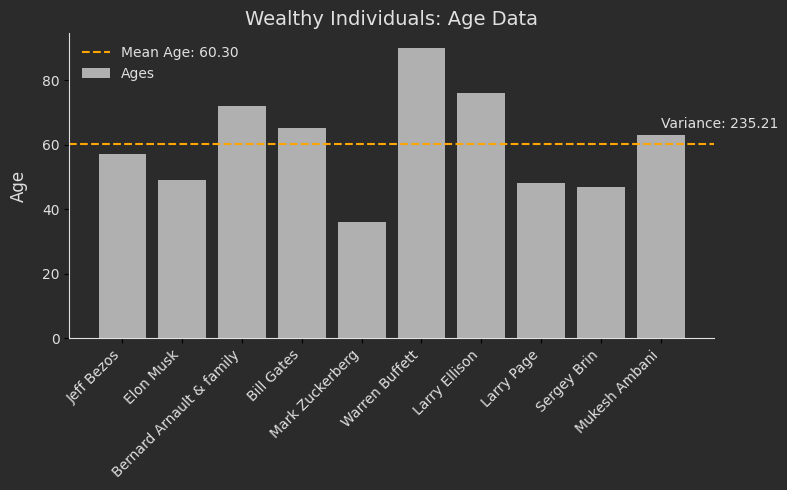

In [80]:
fig = plt.figure(figsize=(8, 5))

fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')


plt.bar(data['Name'], data['Age'], color='#d3d3d3', label='Ages', alpha=0.8)  


plt.axhline(mean_age, color='orange', linestyle='--', linewidth=1.5, label=f'Mean Age: {mean_age:.2f}')

plt.text(len(data['Name']) - 1, mean_age + 5, f"Variance: {variance_age:.2f}", fontsize=10, color='#e0e0e0')


plt.title('Wealthy Individuals: Age Data', fontsize=14, color='#e0e0e0')  
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')  
plt.yticks(fontsize=10, color='#e0e0e0')
plt.ylabel('Age', fontsize=12, labelpad=10, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')  
ax.spines['bottom'].set_color('#e0e0e0')


plt.legend(frameon=False, loc='upper left', fontsize=10, labelcolor='#e0e0e0')


plt.tight_layout()


plt.show()

In [81]:
data['NetWorth'] = data['NetWorth'].str.replace('[$B]', '', regex=True).astype(float)
wealth_by_country = data.groupby('Country')['NetWorth'].sum().reset_index()
wealth_by_country

,Country,NetWorth
0,France,150.0
1,India,84.5
2,United States,918.5


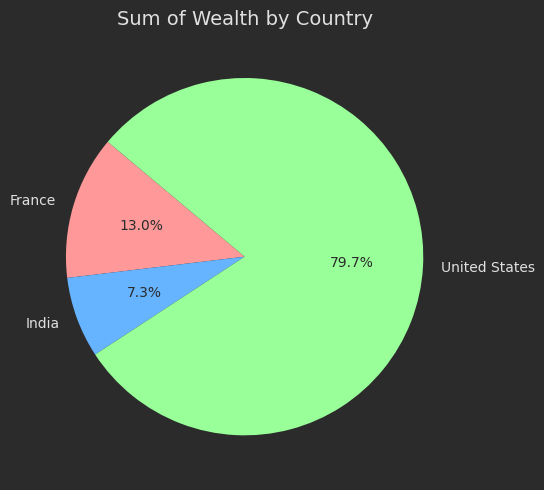

In [ ]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  
wedges, texts, autotexts = plt.pie(
    wealth_by_country['NetWorth'], 
    labels=wealth_by_country['Country'],  
    autopct='%1.1f%%' ,
    colors=colors,
    startangle=140
)

for autotext in autotexts:
    autotext.set_color('#2b2b2b')  
    autotext.set_fontsize(10)  


for text in texts:
    text.set_color('#e0e0e0')  
    text.set_fontsize(10)

plt.title('Sum of Wealth by Country', color='#e0e0e0', fontsize=14)

plt.tight_layout()
plt.show()

In [101]:
data['NetWorth'] = data['NetWorth'].str.replace('[$B]', '', regex=True).astype(float)
us_data = data[data['Country'] == 'United States']
top_10_us = us_data.nlargest(10, 'NetWorth').reset_index()
top_10_us

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,7,Larry Page,91.5,United States,Google,8,48.0,Technology
7,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


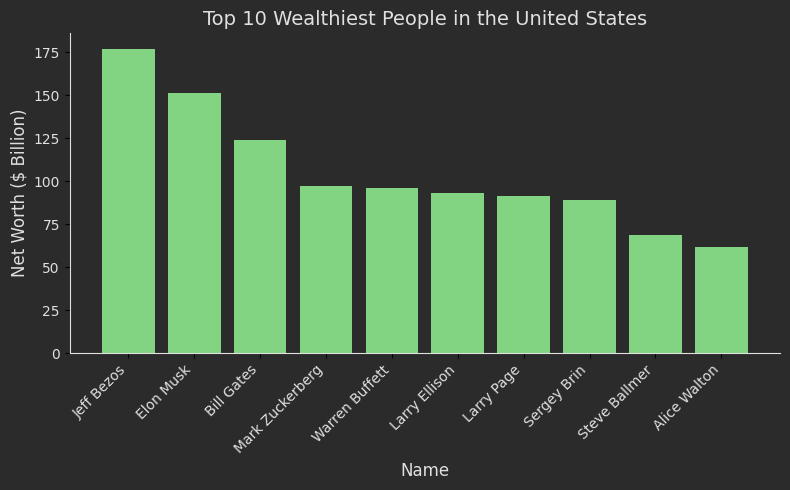

In [ ]:
fig = plt.figure(figsize=(8, 5))
fig.patch.set_facecolor('#2b2b2b') 
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  


plt.bar(top_10_us['Name'], top_10_us['NetWorth'], color='#99ff99', alpha=0.8)


plt.title('Top 10 Wealthiest People in the United States', fontsize=14, color='#e0e0e0')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')
plt.xlabel('Name', fontsize=12, color='#e0e0e0')
plt.ylabel('Net Worth ($ Billion)', fontsize=12, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.tight_layout()


plt.show()

In [118]:
wealthy_counts = data['Country'].value_counts().reset_index()
wealthy_counts.columns = ['Country', 'Count']


fewest_wealthy_countries = wealthy_counts.sort_values(by='Count', ascending=True).reset_index().head(10)
fewest_wealthy_countries = fewest_wealthy_countries.drop(columns=['index'])
fewest_wealthy_countries

,Country,Count
0,Nepal,1
1,Zimbabwe,1
2,St. Kitts and Nevis,1
3,Tanzania,1
4,Macao,1
5,Liechtenstein,1
6,Guernsey,1
7,Venezuela,1
8,Eswatini (Swaziland),1
9,Algeria,1


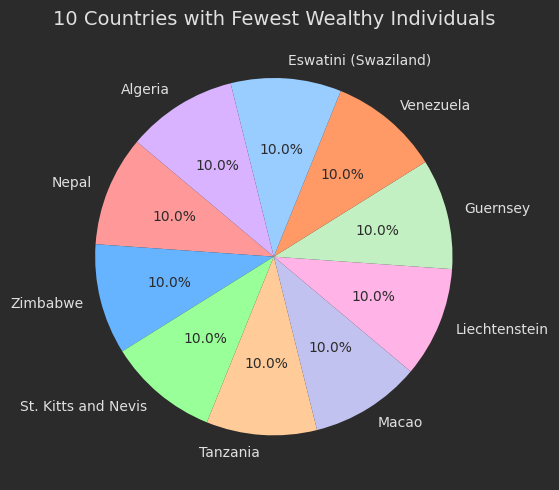

In [111]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#2b2b2b')  
ax.set_facecolor('#2b2b2b')      


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ff9966', '#99ccff', '#d9b3ff']
wedges, texts, autotexts= plt.pie(
    fewest_wealthy_countries['Count'],
    labels=fewest_wealthy_countries['Country'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)

for autotext in autotexts:
    autotext.set_color('#2b2b2b')  
    autotext.set_fontsize(10)  


for text in texts:
    text.set_color('#e0e0e0')  
    text.set_fontsize(10)

plt.title('10 Countries with Fewest Wealthy Individuals', color='#e0e0e0', fontsize=14)

plt.tight_layout()
plt.show()